In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [11]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [4]:
df = pd.read_csv('precipitacao_mensal.csv', sep = ";", index_col = "Data", parse_dates = True)
#df = pd.read_excel('precipitacao_mensal.csv', sep = ";", index_col = "Data", parse_dates = True)
df

,Precipitação
Data,
1956-01-31,"113,7"
1956-02-29,109
1956-03-31,"112,1"
1956-04-30,"188,5"
1956-05-31,"249,6"
...,...
2023-08-31,"144,1"
2023-09-30,"123,3"
2023-10-31,363


In [5]:
df = df.rename(columns={'Precipitação': 'y'})
df

,y
Data,
1956-01-31,"113,7"
1956-02-29,109
1956-03-31,"112,1"
1956-04-30,"188,5"
1956-05-31,"249,6"
...,...
2023-08-31,"144,1"
2023-09-30,"123,3"
2023-10-31,363


In [6]:
#Converte o campo para float e substitui a vírgula por ponto
df['y'] = df['y'].astype(str).str.replace(',', '.').astype(float)
display(df.head())

,y
Data,
1956-01-31,113.7
1956-02-29,109.0
1956-03-31,112.1
1956-04-30,188.5
1956-05-31,249.6


## Média Móvel

A média móvel é uma técnica estatística usada para suavizar séries temporais e identificar tendências. Ela calcula a média de um conjunto de dados em uma janela deslizante ao longo do tempo.Usamos média móvel para:
* Processo de Transformação;
* Suavização da Série;
* Remoção de outliers;
* Identificação de tendências.

Existem diferentes tipos de médias móveis, incluindo a média móvel deslizante (lagging) e a média móvel centralizada.

## Média Móvel Deslizante (Lagging Moving Average)

A média móvel deslizante (ou lagging) calcula a média dos valores **anteriores e incluindo** o ponto de dados atual dentro de uma janela específica:

* Para cada ponto no tempo, ela calcula a média apenas com valores anteriores (passados).

* Exemplo: uma média móvel de 5 períodos (ordem 5) em t usa [t-4, t-3, t-2, t-1, t].

* Sempre “atrasada” em relação à série real → por isso chamamos de lagging.

* Muito usada em análise de preços (como médias móveis simples/aritméticas no mercado financeiro).

✅ Vantagem: não usa dados futuros → pode ser aplicada em previsão em tempo real.

❌ Desvantagem: reage mais lentamente a mudanças bruscas.


Este tipo de média móvel é útil para identificar tendências emergentes, mas introduz um "lag" (atraso) nos dados, pois se baseia apenas em informações passadas e presentes.

## Média Móvel Centralizada (Centered Moving Average)

A média móvel centralizada calcula a média dos valores dentro de uma janela que é **centralizada** no ponto de dados atual. Isso significa que a média inclui pontos de dados anteriores e futuros em relação ao ponto de dados atual:

* Para cada ponto no tempo, considera valores anteriores e posteriores.

* Exemplo: uma média móvel de 5 períodos  (ordem 5) em t usa [t-2, t-1, t, t+1, t+2].

* A suavização fica alinhada ao centro da janela → por isso “centrada”.

✅ Vantagem: suaviza melhor os ruídos e não gera defasagem na linha suavizada.

❌ Desvantagem: não pode ser usada em tempo real, porque precisa de dados futuros (ex.: para calcular o valor de hoje, você teria que saber o preço dos próximos dias).



Resumindo:

* Lagging → usa só o passado → boa para trading/decisão em tempo real.

* Centrada → usa passado + futuro → boa para análise estatística e visualização, mas não serve para prever em tempo real.

## Exemplo em Python de Média Móvel Deslizante (SMA) e a Média Móvel Centrada (CMA), e mostra os gráficos para comparação.

/tmp/ipython-input-1279138053.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  meses = pd.date_range("2022-01-01", periods=24, freq="M")


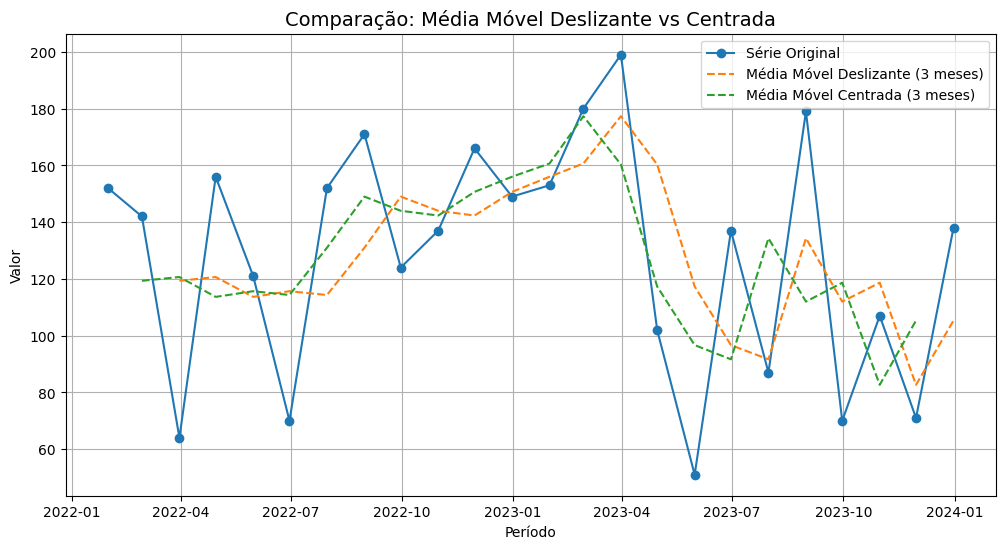

In [7]:
# Criando dados fictícios (ex: vendas mensais)
np.random.seed(42)
dados = np.random.randint(50, 200, size=24)  # 24 meses
meses = pd.date_range("2022-01-01", periods=24, freq="M")
serie = pd.Series(dados, index=meses)

# Média móvel deslizante (SMA) - janela de 3 meses
sma = serie.rolling(window=3).mean()

# Média móvel centrada (CMA) - janela de 3 meses
cma = serie.rolling(window=3, center=True).mean()



# -------------------------------
# Plotando os resultados
# -------------------------------
plt.figure(figsize=(12,6))
plt.plot(serie, label="Série Original", marker="o")
plt.plot(sma, label="Média Móvel Deslizante (3 meses)", linestyle="--")
plt.plot(cma, label="Média Móvel Centrada (3 meses)", linestyle="--")

plt.title("Comparação: Média Móvel Deslizante vs Centrada", fontsize=14)
plt.xlabel("Período")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Concatenar as duas séries em um novo DataFrame
df_concatenated = pd.concat([sma, cma], axis=1)

# Renomear as colunas para melhor clareza
df_concatenated.columns = ['SMA (3 meses)', 'CMA (3 meses)']

# Exibir o DataFrame resultante
display(df_concatenated)

,SMA (3 meses),CMA (3 meses)
2022-01-31,NaN,NaN
2022-02-28,NaN,119.333333
2022-03-31,119.333333,120.666667
2022-04-30,120.666667,113.666667
2022-05-31,113.666667,115.666667
2022-06-30,115.666667,114.333333
2022-07-31,114.333333,131.000000
2022-08-31,131.000000,149.000000
2022-09-30,149.000000,144.000000
2022-10-31,144.000000,142.333333


### Outro exemplo

In [9]:
# Média Móvel Deslizante (Lagging) com janela de 12 meses (exemplo)
df['rolling_mean_lagging_12'] = df['y'].rolling(window=12).mean()

# Média Móvel Centralizada com janela ÍMPAR de 3 meses (exemplo)
df['rolling_mean_centered_odd_3'] = df['y'].rolling(window=3, center=True).mean()

# Agora, calculamos a média móvel centralizada diretamente usando center=True para comparação
df['rolling_mean_centered_6_center_true'] = df['y'].rolling(window=6, center=True).mean()

# Exibir as primeiras linhas com as novas colunas
display(df[['y', 'rolling_mean_lagging_12', 'rolling_mean_centered_odd_3','rolling_mean_centered_6_center_true']].head(10))
# Exibir as últimas linhas para ver o efeito da média centralizada (valores NaN no final)
display(df[['y', 'rolling_mean_lagging_12', 'rolling_mean_centered_odd_3','rolling_mean_centered_6_center_true']].tail(10))

,y,rolling_mean_lagging_12,rolling_mean_centered_odd_3,rolling_mean_centered_6_center_true
Data,,,,
1956-01-31,113.7,NaN,NaN,NaN
1956-02-29,109.0,NaN,111.600000,NaN
1956-03-31,112.1,NaN,136.533333,NaN
1956-04-30,188.5,NaN,183.400000,145.533333
1956-05-31,249.6,NaN,179.466667,168.016667
1956-06-30,100.3,NaN,199.500000,154.533333
1956-07-31,248.6,NaN,125.666667,157.450000
1956-08-31,28.1,NaN,135.433333,139.083333
1956-09-30,129.6,NaN,78.666667,101.466667


,y,rolling_mean_lagging_12,rolling_mean_centered_odd_3,rolling_mean_centered_6_center_true
Data,,,,
2023-03-31,330.8,188.183333,281.566667,184.816667
2023-04-30,106.9,188.191667,156.066667,193.650000
2023-05-31,30.5,185.208333,94.866667,181.816667
2023-06-30,147.2,189.141667,82.066667,138.000000
2023-07-31,68.5,189.916667,119.933333,103.416667
2023-08-31,144.1,189.650000,111.966667,146.100000
2023-09-30,123.3,171.800000,210.133333,182.166667
2023-10-31,363.0,167.275000,244.400000,191.916667
2023-11-30,246.9,183.491667,271.866667,NaN


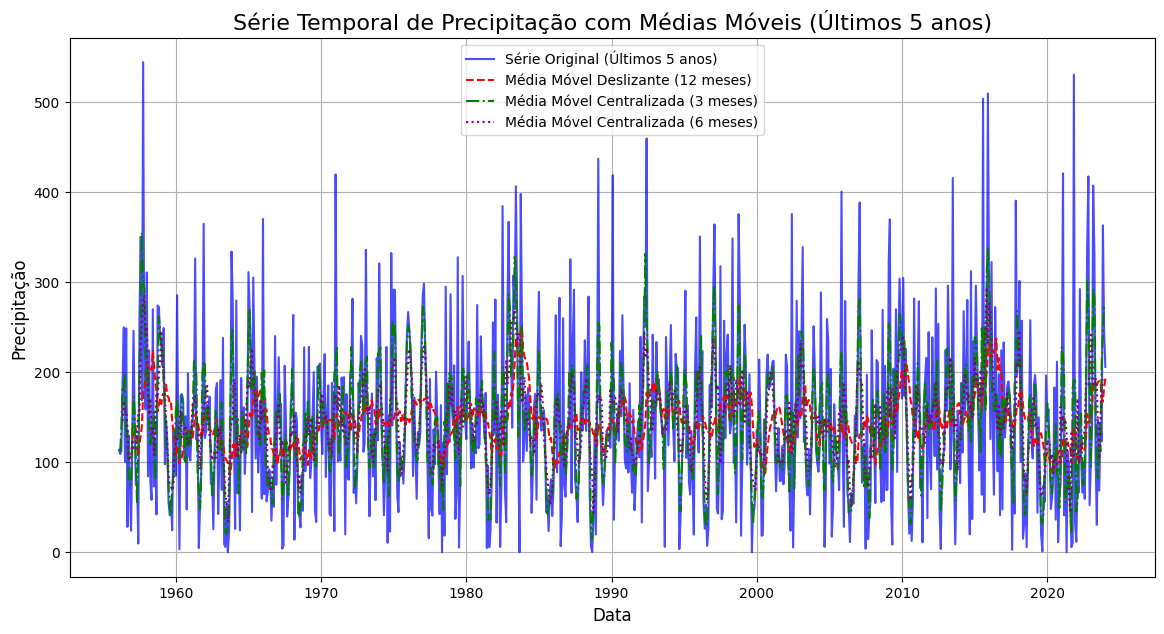

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(df['y'], label='Série Original (Últimos 5 anos)', color='blue', alpha=0.7)
plt.plot(df['rolling_mean_lagging_12'], label='Média Móvel Deslizante (12 meses)', color='red', linestyle='--')
plt.plot(df['rolling_mean_centered_odd_3'], label='Média Móvel Centralizada (3 meses)', color='green', linestyle='-.')
plt.plot(df['rolling_mean_centered_6_center_true'], label='Média Móvel Centralizada (6 meses)', color='purple', linestyle=':')

plt.title('Série Temporal de Precipitação com Médias Móveis (Últimos 5 anos)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Precipitação', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

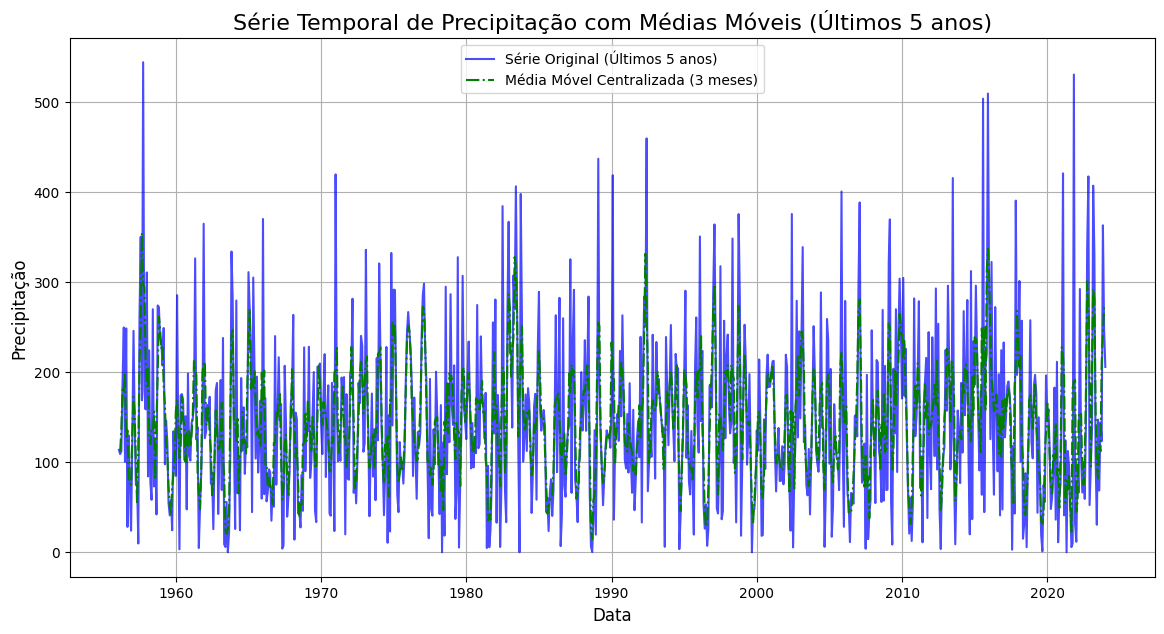

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(df['y'], label='Série Original (Últimos 5 anos)', color='blue', alpha=0.7)
plt.plot(df['rolling_mean_centered_odd_3'], label='Média Móvel Centralizada (3 meses)', color='green', linestyle='-.')
plt.title('Série Temporal de Precipitação com Médias Móveis (Últimos 5 anos)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Precipitação', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

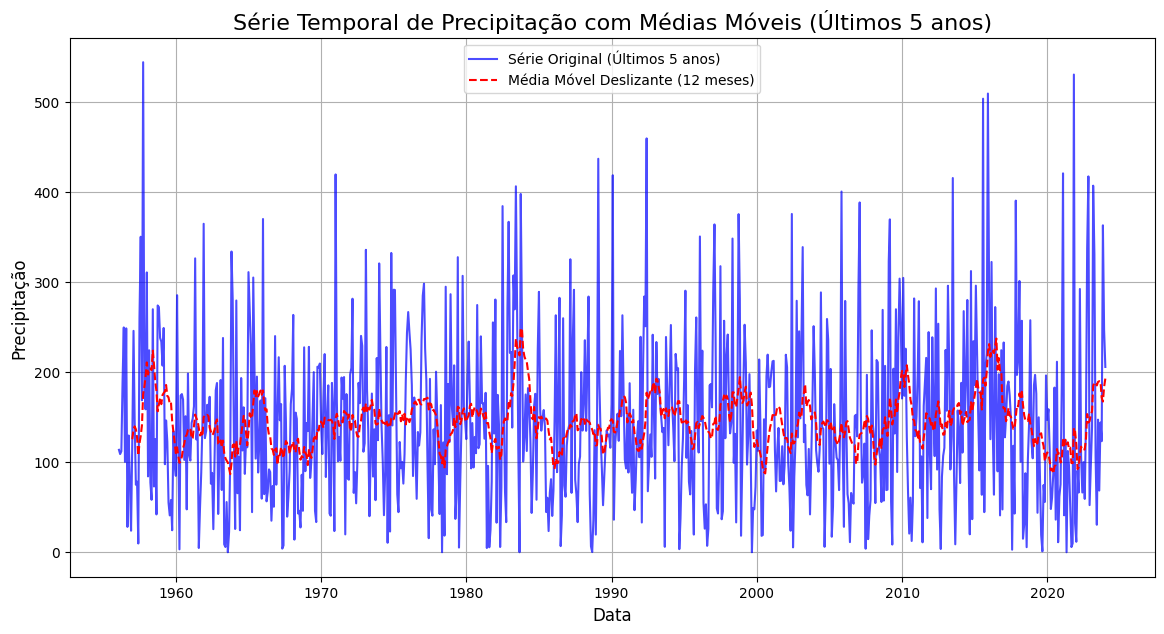

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(df['y'], label='Série Original (Últimos 5 anos)', color='blue', alpha=0.7)
plt.plot(df['rolling_mean_lagging_12'], label='Média Móvel Deslizante (12 meses)', color='red', linestyle='--')

plt.title('Série Temporal de Precipitação com Médias Móveis', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Precipitação', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-3911593576.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_last_5_years = df.last('5Y')
/tmp/ipython-input-3911593576.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_last_5_years = df.last('5Y')


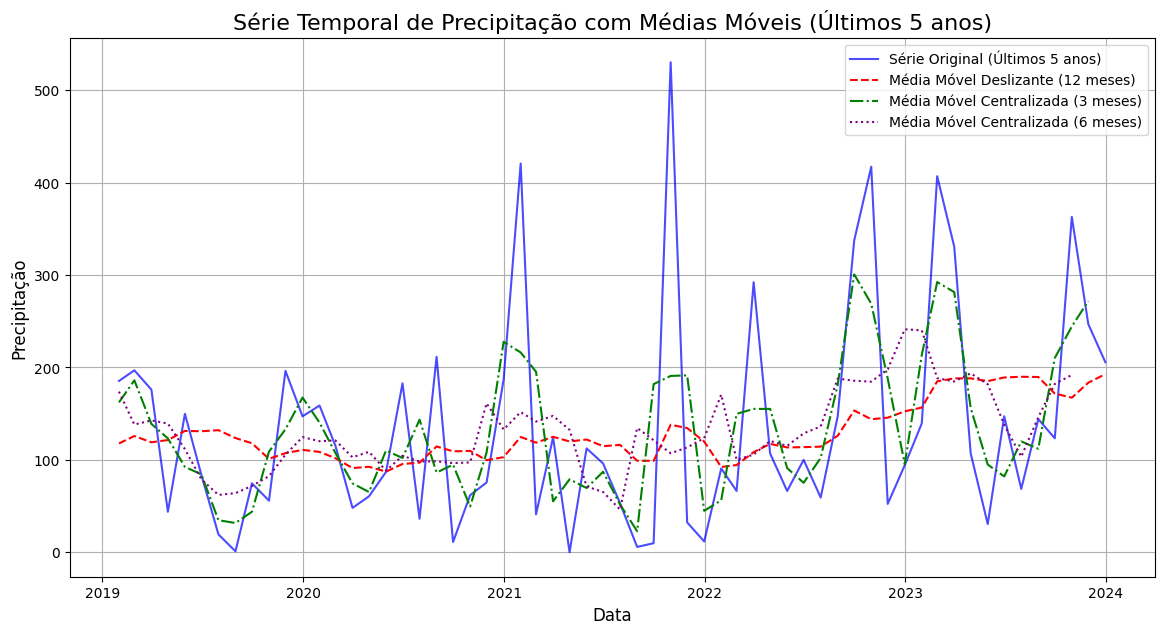

##

# Previsão com Média Móveis

### Qual o tamanho ideal da janela deslizante que eu vou utilizar?

### Posso utilizar métricas de erros para verificar qual a melhor?

In [33]:
# Lista para armazenar os resultados de MSE e os valores de n
mse_results = []

# tentando de 3 até metade mais 1
for n in range(3, int(len(df) / 2 + 1)):
    mean_for_n = np.zeros(len(df) - n)
    for i in range(0, len(df) - n):
        mean_for_n[i] = np.power(np.mean(df['y'].iloc[i:i+n]) - df['y'].iloc[i + n], 2)
    current_mse = np.mean(mean_for_n)
    mse_results.append((current_mse, n))

# Classificar os resultados pelo MSE (do menor para o maior)
mse_results.sort(key=lambda x: x[0])

# Obter os 5 melhores resultados
top_5_results = mse_results[:5]

print("Top 5 melhores médias móveis (baseado no menor MSE):")
for mse, n in top_5_results:
    print(f"n = {n}, MSE = {mse}")

Top 5 melhores médias móveis (baseado no menor MSE):
n = 49, MSE = 8972.77165899476
n = 98, MSE = 8974.952781193768
n = 97, MSE = 8982.82377940601
n = 99, MSE = 8982.884309582163
n = 51, MSE = 8988.605829130576


Usando o melhor n encontrado para previsão: 49


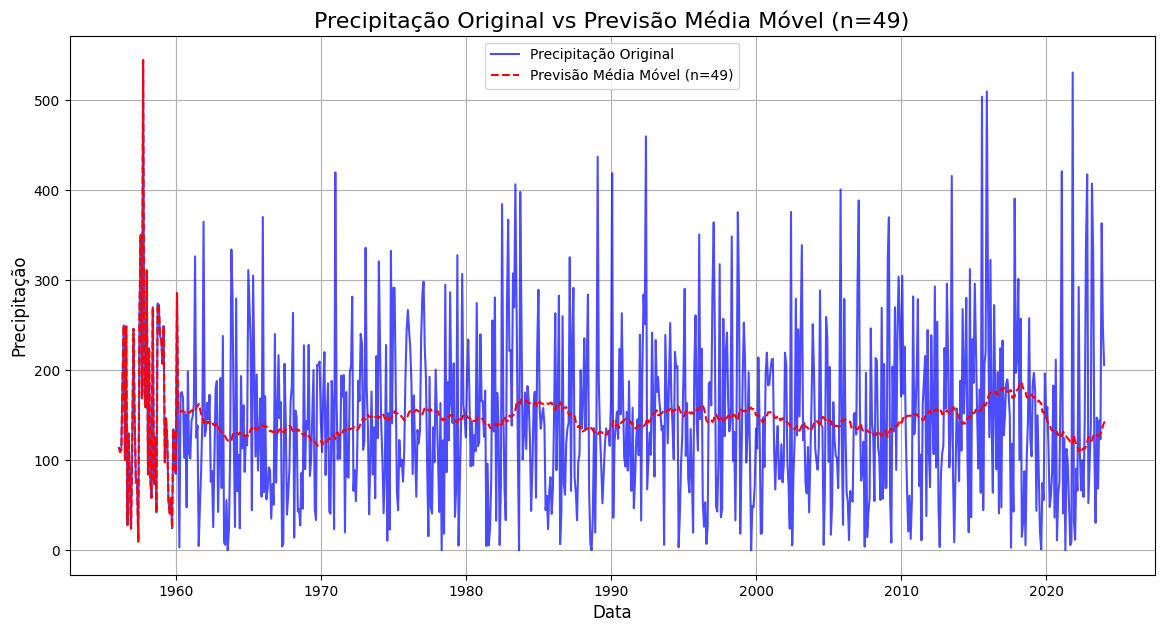

In [38]:
# Escolha o melhor n do top 5 (o primeiro item da lista)
optimal_n = top_5_results[0][1]
print(f"Usando o melhor n encontrado para previsão: {optimal_n}")

# Gerar a previsão usando o melhor n
forecast = np.zeros(len(df) + 1)
for i in range(0, optimal_n):
    forecast[i] = df['y'].iloc[i] # Usar os valores originais para os primeiros 'n' pontos
for i in range(0, len(df) - optimal_n + 1):
        forecast[i+optimal_n] = np.mean(df['y'].iloc[i:i+optimal_n])

# Criar a série de previsão com o índice correto
forecast_series = pd.Series(forecast, index=df.index.union([df.index[-1] + pd.offsets.MonthEnd(1)]))

# Concatenar o DataFrame original com a série de previsão
df_with_forecast = pd.concat([df['y'], forecast_series], axis=1)

# Renomear as colunas
df_with_forecast.columns = ['Precipitação Original', f'Previsão Média Móvel (n={optimal_n})']

# Plotar os resultados
plt.figure(figsize=(14, 7))
plt.plot(df_with_forecast['Precipitação Original'], label='Precipitação Original', color='blue', alpha=0.7)
plt.plot(df_with_forecast[f'Previsão Média Móvel (n={optimal_n})'], label=f'Previsão Média Móvel (n={optimal_n})', color='red', linestyle='--')

plt.title(f'Precipitação Original vs Previsão Média Móvel (n={optimal_n})', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Precipitação', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Componentes de uma Série Temporal

## Decomposição

* Tendência - aumento ou redução da série a longo prazo;
* Sazonalidade - padrões que ocorrem em intervalos fixos;
* Ciclo - aumento ou redução de fequência sem intervalos fixos;
* Resíduos (ou erros): A parte aleatória ou não explicada pela tendência e sazonalidade, calculada como:
$$\text{Resíduo}_t = y_t - (\text{Tendência}_t + \text{Sazonalidade}_t)$$, onde $ y_t $ é o valor observado no tempo $ t $.

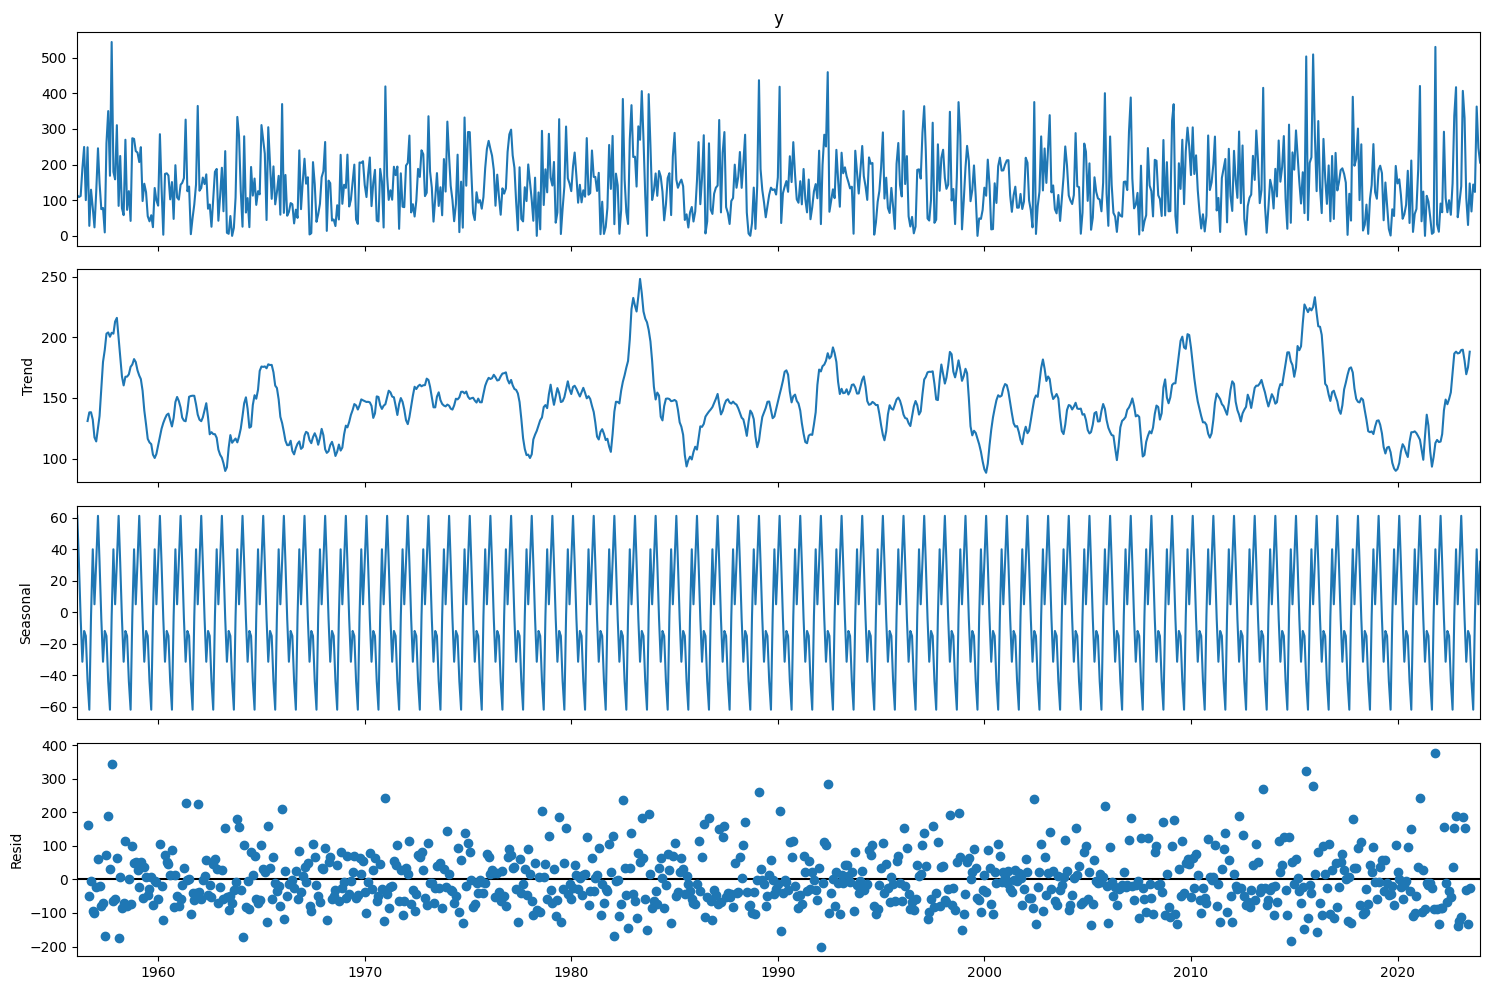

In [41]:
decomposition = seasonal_decompose(df['y'],
                                   model='add')


# Plot the decomposed components (trend, seasonal, and residual)
fig = decomposition.plot()
plt.show()

In [42]:
# Para a série que estou utilizando o colaboratory retornará um erro.
decomposition = seasonal_decompose(df['y'],
                                   model='mult')


# Plot the decomposed components (trend, seasonal, and residual)
fig = decomposition.plot()
plt.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

## Série Temporal Estacionária

Uma série temporal é considerada **estacionária** se suas propriedades estatísticas (média, variância e autocorrelação) permanecem constantes ao longo do tempo. Em outras palavras, a forma como a série se comporta não muda com o passar do tempo.

**Características de uma Série Estacionária:**

*   **Média Constante:** O valor médio da série não apresenta uma tendência clara de aumento ou diminuição.
*   **Variância Constante (Homoscedasticidade):** A dispersão dos dados em torno da média (a variância) é relativamente uniforme ao longo do tempo, sem períodos de alta ou baixa volatilidade pronunciada.
*   **Autocorrelação Constante:** A correlação entre os valores da série e seus valores defasados (autocorrelação) depende apenas do número de períodos de defasagem, e não do ponto específico no tempo.

**Por que a Estacionariedade é Importante?**

Muitos modelos de previsão de séries temporais (como ARIMA) assumem que a série é estacionária. Se a série não for estacionária, é comum aplicar transformações (como diferenciação) para torná-la estacionária antes de aplicar o modelo.

**Como Verificar se uma Série é Estacionária:**

Existem algumas maneiras de verificar a estacionariedade de uma série temporal:

1.  **Inspeção Visual:**
    *   **Gráfico da Série Temporal:** Observe o gráfico da série ao longo do tempo. Uma série estacionária tende a oscilar em torno de uma média constante, sem tendências claras ou mudanças na variabilidade.
    *   **Gráficos de Autocorrelação (ACF) e Autocorrelação Parcial (PACF):** Para uma série estacionária, os valores de autocorrelação (ACF) decaem rapidamente para zero, e os valores de autocorrelação parcial (PACF) geralmente se cortam (tornam-se insignificantes) após um pequeno número de defasagens.

2.  **Testes Estatísticos:**
    *   **Teste Dickey-Fuller Aumentado (ADF - Augmented Dickey-Fuller Test):** Este é um dos testes mais comuns. A hipótese nula (H0) do teste ADF é que a série temporal **não é estacionária** (possui uma raiz unitária). Se o valor p (p-value) do teste for menor que um nível de significância (geralmente 0.05), rejeitamos a hipótese nula e concluímos que a série é provavelmente estacionária.
    *   **Teste Kwiatkowski-Phillips-Schmidt-Shin (KPSS Test):** Este teste tem a hipótese nula (H0) oposta ao ADF, ou seja, a hipótese nula é que a série temporal **é estacionária**. Se o valor p do teste KPSS for menor que um nível de significância, rejeitamos a hipótese nula e concluímos que a série não é estacionária.

**Exemplo (em Python):**

Para aplicar o teste ADF em Python, você pode usar a função `adfuller` do módulo `statsmodels.tsa.stattools`:

In [45]:
X = df['y']
result = adfuller(X)
print('ADF Estatíticas: %f' % result[0])
print('Valor de P: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Estatíticas: -6.525717
Valor de P: 0.000000
Valores Críticos:
	1%: -3.439
	5%: -2.865
	10%: -2.569


## Como tranformar(Transformação) uma série estácionário não  estacionária em uma série não estacionária.

Obs: Aplicar as técnicas não garante que ela realmente se tornará.

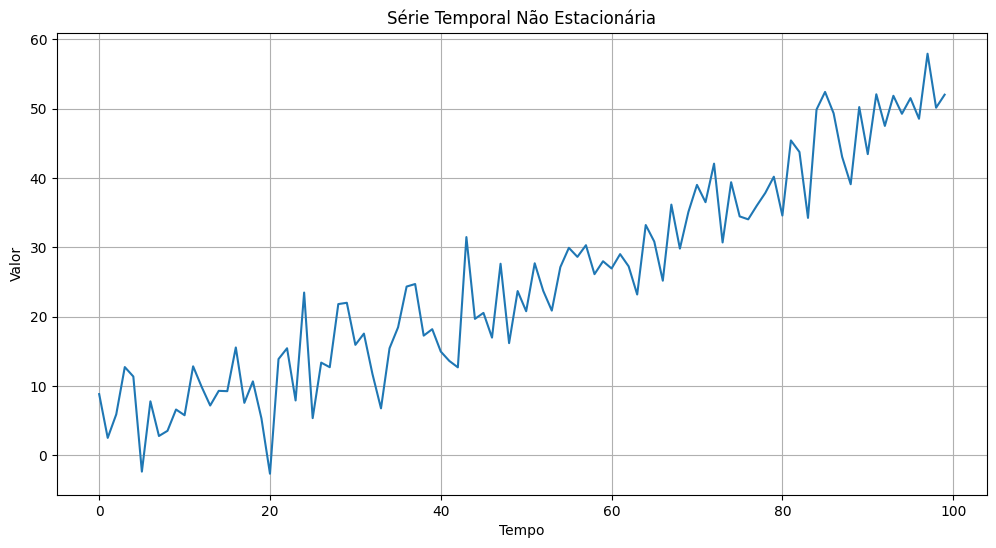

Teste ADF na Série Não Estacionária:
ADF Estatísticas: 1.882115
Valor de P: 0.998499
Valores Críticos:
	1%: -3.508
	5%: -2.895
	10%: -2.585


In [48]:
# Gerar uma série temporal não estacionária (com tendência)
np.random.seed(0)
n_points = 100
trend = np.linspace(0, 50, n_points)
noise = np.random.normal(0, 5, n_points)
non_stationary_series = trend + noise
non_stationary_series = pd.Series(non_stationary_series)

# Plotar a série não estacionária
plt.figure(figsize=(12, 6))
plt.plot(non_stationary_series)
plt.title('Série Temporal Não Estacionária')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

# Realizar o teste ADF na série não estacionária
print("Teste ADF na Série Não Estacionária:")
result_non_stationary = adfuller(non_stationary_series)
print('ADF Estatísticas: %f' % result_non_stationary[0])
print('Valor de P: %f' % result_non_stationary[1])
print('Valores Críticos:')
for key, value in result_non_stationary[4].items():
   print('\t%s: %.3f' % (key, value))

## Uso de log para estacionalidade

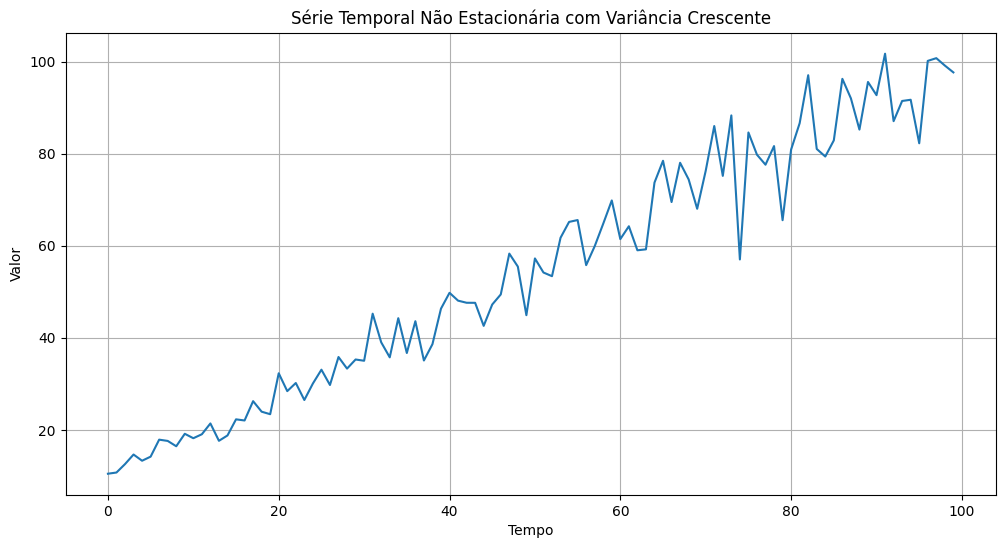

Teste ADF na Série Não Estacionária (Variância Crescente):
ADF Estatísticas: -0.164496
Valor de P: 0.942623
Valores Críticos:
	1%: -3.506
	5%: -2.895
	10%: -2.584


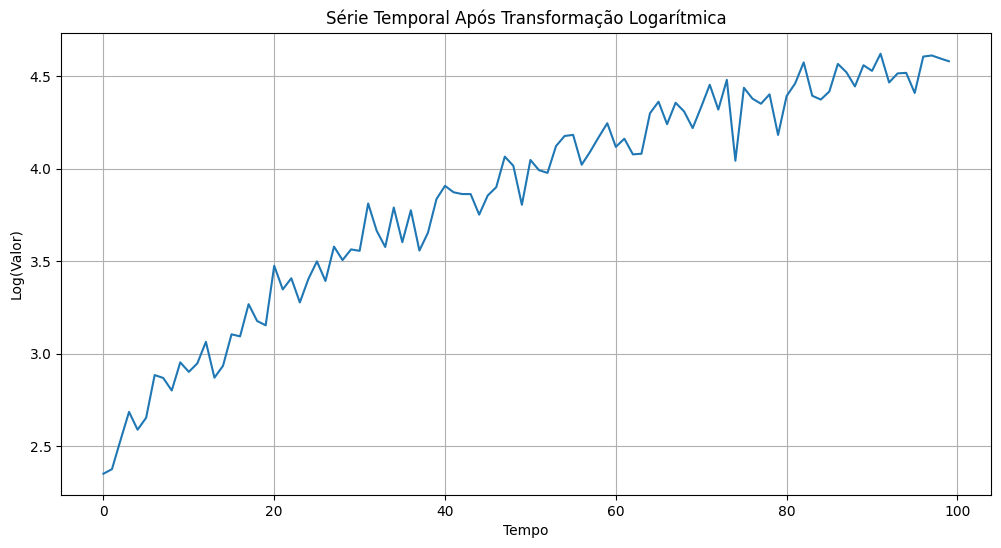


Teste ADF na Série Após Transformação Logarítmica:
ADF Estatísticas: -4.468259
Valor de P: 0.000224
Valores Críticos:
	1%: -3.506
	5%: -2.895
	10%: -2.584


In [50]:
# Gerar uma série temporal não estacionária com variância crescente
np.random.seed(42)
n_points = 100
trend = np.linspace(10, 100, n_points)
# Aumentar a magnitude do ruído ao longo do tempo
noise = np.random.normal(0, np.linspace(1, 10, n_points), n_points)
non_stationary_series_var = trend + noise
# Garantir que os valores sejam positivos para a transformação logarítmica
non_stationary_series_var[non_stationary_series_var <= 0] = 1e-6
non_stationary_series_var = pd.Series(non_stationary_series_var)


# Plotar a série não estacionária com variância crescente
plt.figure(figsize=(12, 6))
plt.plot(non_stationary_series_var)
plt.title('Série Temporal Não Estacionária com Variância Crescente')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

# Realizar o teste ADF na série não estacionária com variância crescente
print("Teste ADF na Série Não Estacionária (Variância Crescente):")
result_non_stationary_var = adfuller(non_stationary_series_var)
print('ADF Estatísticas: %f' % result_non_stationary_var[0])
print('Valor de P: %f' % result_non_stationary_var[1])
print('Valores Críticos:')
for key, value in result_non_stationary_var[4].items():
   print('\t%s: %.3f' % (key, value))

# Aplicar a transformação logarítmica
stationary_series_log = np.log(non_stationary_series_var)

# Plotar a série após a transformação logarítmica
plt.figure(figsize=(12, 6))
plt.plot(stationary_series_log)
plt.title('Série Temporal Após Transformação Logarítmica')
plt.xlabel('Tempo')
plt.ylabel('Log(Valor)')
plt.grid(True)
plt.show()

# Realizar o teste ADF na série após a transformação logarítmica
print("\nTeste ADF na Série Após Transformação Logarítmica:")
result_stationary_log = adfuller(stationary_series_log)
print('ADF Estatísticas: %f' % result_stationary_log[0])
print('Valor de P: %f' % result_stationary_log[1])
print('Valores Críticos:')
for key, value in result_stationary_log[4].items():
   print('\t%s: %.3f' % (key, value))

##Obs :

Mesmo após a transformação logarítmica, o gráfico da série temporal ainda  apresenta alguma tendência. No entanto, o teste Dickey-Fuller Aumentado (ADF) fornece uma avaliação estatística mais formal da estacionariedade.

Neste caso, o valor de P do teste ADF para a série transformada logaritmicamente foi de **0.000224**.

Lembre-se da hipótese nula (H0) do teste ADF: a série temporal **não é estacionária** (possui uma raiz unitária).

Como o valor de P (0.000224) é **muito menor** que o nível de significância comum de 0.05 (ou até mesmo 0.01), nós **rejeitamos a hipótese nula**.

Isso significa que, estatisticamente, temos forte evidência para concluir que a série temporal após a transformação logarítmica é **estacionária**.

A transformação logarítmica foi eficaz em estabilizar a variância (reduzindo a heterocedasticidade que era visível na série original com variância crescente), o que contribuiu significativamente para a estacionariedade detectada pelo teste ADF, mesmo que uma leve tendência ainda possa ser sutilmente percebida visualmente. Em muitos casos, a combinação de transformações (como logarítmica e diferenciação) pode ser necessária para alcançar a estacionariedade completa dependendo das características da série.

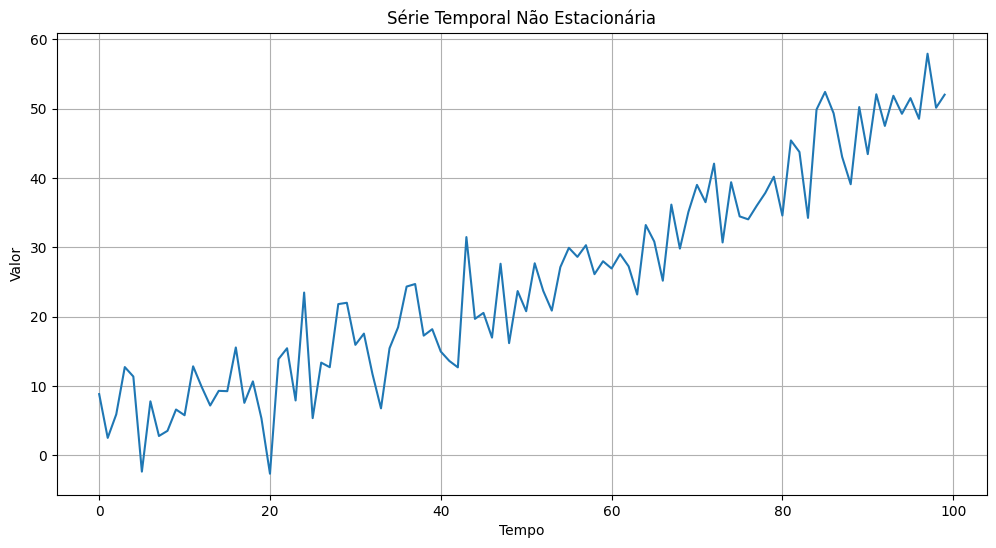

Teste ADF na Série Não Estacionária:
ADF Estatísticas: 1.882115
Valor de P: 0.998499
Valores Críticos:
	1%: -3.508
	5%: -2.895
	10%: -2.585


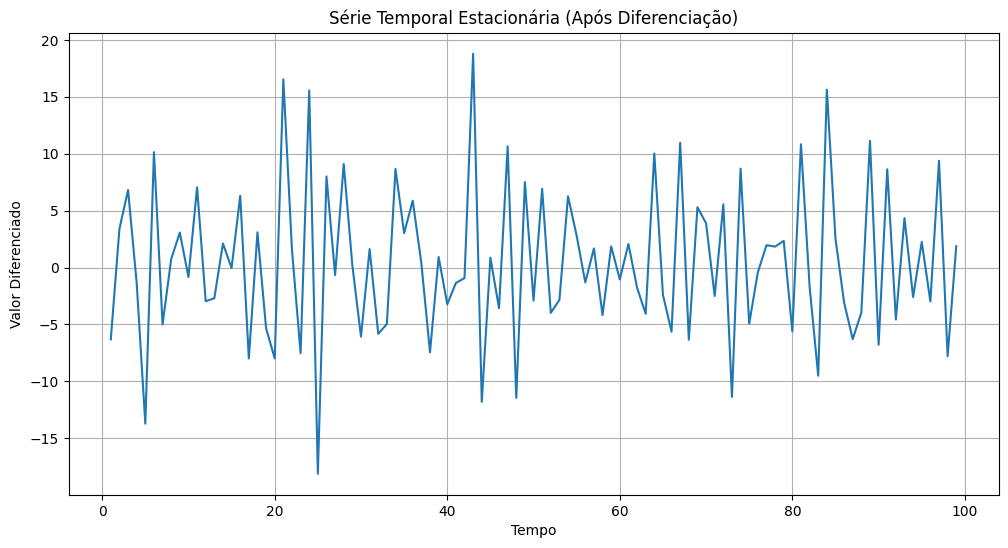


Teste ADF na Série Estacionária (Após Diferenciação):
ADF Estatísticas: -5.467995
Valor de P: 0.000002
Valores Críticos:
	1%: -3.508
	5%: -2.895
	10%: -2.585


In [51]:
# Gerar uma série temporal não estacionária (com tendência)
np.random.seed(0)
n_points = 100
trend = np.linspace(0, 50, n_points)
noise = np.random.normal(0, 5, n_points)
non_stationary_series = trend + noise
non_stationary_series = pd.Series(non_stationary_series)

# Plotar a série não estacionária
plt.figure(figsize=(12, 6))
plt.plot(non_stationary_series)
plt.title('Série Temporal Não Estacionária')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

# Realizar o teste ADF na série não estacionária
print("Teste ADF na Série Não Estacionária:")
result_non_stationary = adfuller(non_stationary_series)
print('ADF Estatísticas: %f' % result_non_stationary[0])
print('Valor de P: %f' % result_non_stationary[1])
print('Valores Críticos:')
for key, value in result_non_stationary[4].items():
   print('\t%s: %.3f' % (key, value))

# Aplicar a diferenciação de primeira ordem
stationary_series = non_stationary_series.diff().dropna()

# Plotar a série estacionária (após diferenciação)
plt.figure(figsize=(12, 6))
plt.plot(stationary_series)
plt.title('Série Temporal Estacionária (Após Diferenciação)')
plt.xlabel('Tempo')
plt.ylabel('Valor Diferenciado')
plt.grid(True)
plt.show()

# Realizar o teste ADF na série estacionária
print("\nTeste ADF na Série Estacionária (Após Diferenciação):")
result_stationary = adfuller(stationary_series)
print('ADF Estatísticas: %f' % result_stationary[0])
print('Valor de P: %f' % result_stationary[1])
print('Valores Críticos:')
for key, value in result_stationary[4].items():
   print('\t%s: %.3f' % (key, value))

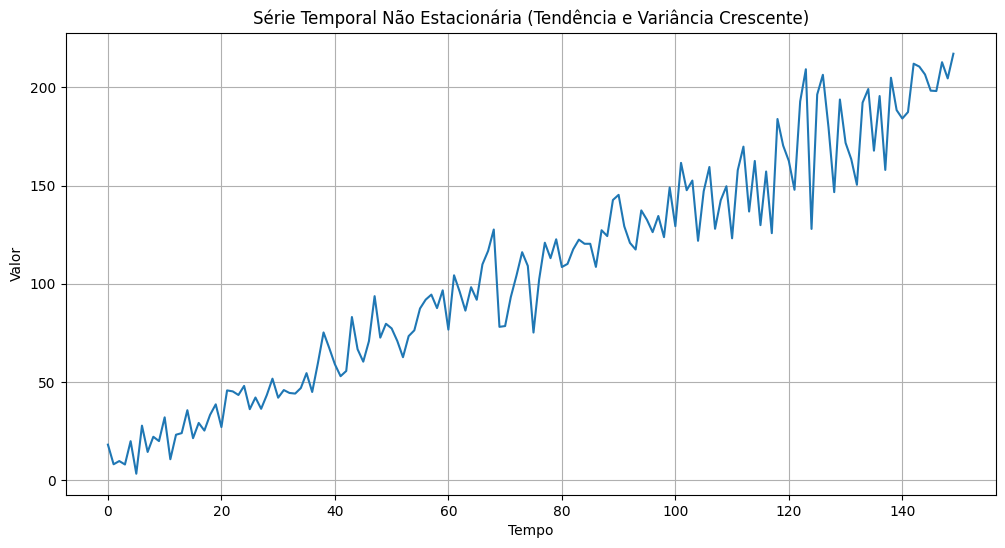

Teste ADF na Série Original:
ADF Estatísticas: 0.327122
Valor de P: 0.978555
Valores Críticos:
	1%: -3.478
	5%: -2.883
	10%: -2.578


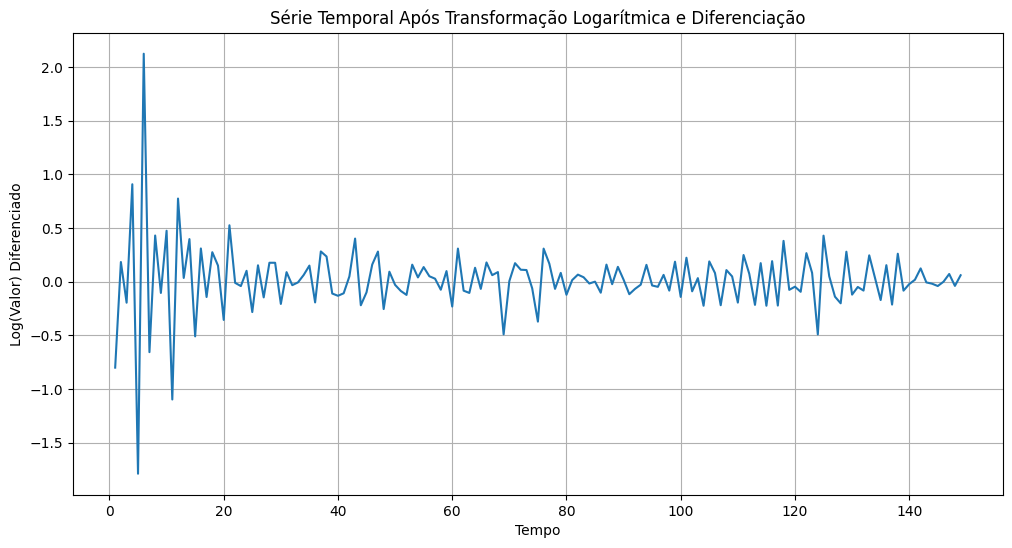


Teste ADF na Série Após Transformação Logarítmica e Diferenciação:
ADF Estatísticas: -10.078476
Valor de P: 0.000000
Valores Críticos:
	1%: -3.477
	5%: -2.882
	10%: -2.578


In [52]:
# Gerar uma série temporal não estacionária com tendência e variância crescente
np.random.seed(1)
n_points = 150
trend = np.linspace(10, 200, n_points)
noise = np.random.normal(0, np.linspace(5, 25, n_points), n_points)
non_stationary_series_combined = trend + noise
non_stationary_series_combined[non_stationary_series_combined <= 0] = 1e-6 # Ensure positive values
non_stationary_series_combined = pd.Series(non_stationary_series_combined)

# Plotar a série original
plt.figure(figsize=(12, 6))
plt.plot(non_stationary_series_combined)
plt.title('Série Temporal Não Estacionária (Tendência e Variância Crescente)')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

# Realizar o teste ADF na série original
print("Teste ADF na Série Original:")
result_original = adfuller(non_stationary_series_combined)
print('ADF Estatísticas: %f' % result_original[0])
print('Valor de P: %f' % result_original[1])
print('Valores Críticos:')
for key, value in result_original[4].items():
   print('\t%s: %.3f' % (key, value))

# Aplicar a transformação logarítmica
series_log = np.log(non_stationary_series_combined)

# Aplicar a diferenciação de primeira ordem à série log-transformada
series_log_diff = series_log.diff().dropna()

# Plotar a série após log e diferenciação
plt.figure(figsize=(12, 6))
plt.plot(series_log_diff)
plt.title('Série Temporal Após Transformação Logarítmica e Diferenciação')
plt.xlabel('Tempo')
plt.ylabel('Log(Valor) Diferenciado')
plt.grid(True)
plt.show()

# Realizar o teste ADF na série após log e diferenciação
print("\nTeste ADF na Série Após Transformação Logarítmica e Diferenciação:")
result_transformed = adfuller(series_log_diff)
print('ADF Estatísticas: %f' % result_transformed[0])
print('Valor de P: %f' % result_transformed[1])
print('Valores Críticos:')
for key, value in result_transformed[4].items():
   print('\t%s: %.3f' % (key, value))

## Reversão de Transformações em Séries Temporais

Quando você utiliza transformações (como logarítmica, diferenciação, etc.) para tornar uma série temporal estacionária e, em seguida, usa um modelo para fazer previsões na série transformada, é crucial **reverter** essas transformações para obter as previsões na escala original da sua série.

**Por que reverter?**

Os modelos de previsão (como ARIMA) que trabalham com séries estacionárias geram previsões que correspondem aos valores da série **após** a transformação. Para que essas previsões tenham significado prático e sejam comparáveis com os dados originais, elas precisam ser trazidas de volta para a escala em que a série foi originalmente medida.



## Importante

Você levantou um ponto muito importante sobre os modelos ARIMA!

Sim, você está correto. Uma das características fundamentais do modelo ARIMA é que ele **incorpora o processo de diferenciação** internamente. O termo "I" no ARIMA significa "Integrated" (Integrado), e o parâmetro associado a ele, denotado por **d**, especifica a ordem da diferenciação a ser aplicada à série temporal para torná-la estacionária antes que as partes AR (AutoRegressivo) e MA (Médias Móveis) do modelo sejam ajustadas.

Portanto, ao utilizar um modelo ARIMA, você **não precisa realizar a diferenciação da sua série manualmente** antes de alimentar os dados no modelo. Em vez disso, você define o parâmetro `d` com a ordem de diferenciação apropriada que você determinou ser necessária (por exemplo, através da análise visual e testes de estacionariedade como o ADF).

Por exemplo:

*   Um modelo `ARIMA(p, 0, q)`: Assume que a série já é estacionária (d=0) e não aplica diferenciação.
*   Um modelo `ARIMA(p, 1, q)`: Aplica uma diferenciação de primeira ordem (d=1) para remover uma tendência linear.
*   Um modelo `ARIMA(p, 2, q)`: Aplica uma diferenciação de segunda ordem (d=2) para remover uma tendência quadrática (menos comum).
*   Modelos `SARIMA` (Sazonal ARIMA): Possuem parâmetros adicionais para lidar com a sazonalidade, incluindo diferenciação sazonal.

Em resumo, o ARIMA simplifica o fluxo de trabalho ao incluir a diferenciação como um passo interno do modelo, permitindo que você especifique o nível de integração necessário através do parâmetro `d`.